#BIBLIOTECAS

In [1]:
# @title Importando as bibliotecas necessárias
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#DADOS

In [2]:
# @title Obtendo os dados de tráfego
links = [
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/ae389d4f-9ef0-49e8-8ef4-0e1bcafe1650/download/dadosfluxovelocidadeemquinzeminuto-foto-jan-22.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/d22982e7-49a6-40e5-ab3d-d355f8b898c5/download/recife-fotossensores-22-fevereiro.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/929bbe4b-0817-4db4-bb3e-04230418cd1f/download/recife-fotossensores-22-marco.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/fa53b43b-8842-4ab5-a288-02a4f0c983d1/download/recife-fotossensores-22-abril.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/a6c30b81-96da-4b20-8932-3f8db3c29b6f/download/recife-fotossensores-22-maio.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/9f449928-cbff-4a5e-b1e1-801065ee25de/download/recife-fotossensores-22-junho.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/3d0276de-3a7c-4bcb-b613-e2eeffa2e92c/download/recife-fotossensores-22-julho.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/99f96c7b-ba2d-4ec9-8600-6b72ad597574/download/recife-fotossensores-22-agosto.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/6df257a8-1594-4de9-b1c3-2ddb4c13e835/download/recife-fotossensores-22-setembro.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/97e0ff0a-0d39-4e58-a6e7-5f7366fb6cff/download/recife-fotossensores-22-outubro.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/46ec2435-30c9-46e9-80e4-406bd0e0bf02/download/recife-fotossensores-22-novembro.csv',
'http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/8dcf9eaf-3b5a-4d2e-a61d-1e31fa92a531/download/dadosfluxovelocidadeemquinzeminuto-foto-dez-22.csv',
]
for link in links:
  !wget $link;


--2024-09-05 21:25:27--  http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/ae389d4f-9ef0-49e8-8ef4-0e1bcafe1650/download/dadosfluxovelocidadeemquinzeminuto-foto-jan-22.csv
Resolving dados.recife.pe.gov.br (dados.recife.pe.gov.br)... 192.207.206.133
Connecting to dados.recife.pe.gov.br (dados.recife.pe.gov.br)|192.207.206.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15750490 (15M) [text/csv]
Saving to: ‘dadosfluxovelocidadeemquinzeminuto-foto-jan-22.csv’

dadosfluxovelocidad 100%[===================>]  15.02M  6.25MB/s    in 2.4s    

2024-09-05 21:25:31 (6.25 MB/s) - ‘dadosfluxovelocidadeemquinzeminuto-foto-jan-22.csv’ saved [15750490/15750490]

--2024-09-05 21:25:31--  http://dados.recife.pe.gov.br/dataset/71bd11f4-f312-4896-aa07-faecf4b0cad2/resource/d22982e7-49a6-40e5-ab3d-d355f8b898c5/download/recife-fotossensores-22-fevereiro.csv
Resolving dados.recife.pe.gov.br (dados.recife.pe.gov.br)... 192.207.206.133
Connecting

In [3]:
# @title Preparando o Dataset
diretorio = "/content/"
files = glob.glob(diretorio + "*.csv")
dataframes = []

for file in files:
  try:
    dados = pd.read_csv(file, sep = ';')
    dataframes.append(dados)
  except:
    pass
df = pd.concat(dataframes, ignore_index=True)

In [4]:
# @title Adicionando localização dos equipamentos
!wget http://dados.recife.pe.gov.br/dataset/a511fbb8-c339-4618-be9e-8aa1fe880f5b/resource/e4c5acc3-c0b9-4127-ad08-472c5b9b003f/download/equipamentosfiscalizacao.csv

radares = pd.read_csv('equipamentosfiscalizacao.csv', sep=';')
radares = radares[['identificacao_equipamento', 'latitude', 'longitude']]

# Função para adicionar 'REC' ao final dos valores que começam com 'FS'
def adicionar_rec(equipamento):
    if equipamento.startswith('FS'):
        return equipamento + 'REC'
    return equipamento

radares['identificacao_equipamento'] = radares['identificacao_equipamento'].apply(adicionar_rec)

radares.rename(columns={'identificacao_equipamento': 'equipamento'}, inplace=True)

df = pd.merge(df, radares, on='equipamento', how='left')

--2024-09-05 21:26:16--  http://dados.recife.pe.gov.br/dataset/a511fbb8-c339-4618-be9e-8aa1fe880f5b/resource/e4c5acc3-c0b9-4127-ad08-472c5b9b003f/download/equipamentosfiscalizacao.csv
Resolving dados.recife.pe.gov.br (dados.recife.pe.gov.br)... 192.207.206.133
Connecting to dados.recife.pe.gov.br (dados.recife.pe.gov.br)|192.207.206.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10181 (9.9K) [text/csv]
Saving to: ‘equipamentosfiscalizacao.csv’

equipamentosfiscali 100%[===================>]   9.94K  --.-KB/s    in 0.001s  

2024-09-05 21:26:17 (10.4 MB/s) - ‘equipamentosfiscalizacao.csv’ saved [10181/10181]



In [5]:
# @title Visualizando o Dataset
df.head()

,mes,equipamento,faixa,data,hora,minutos_intervalo,qtd_0a10km,qtd_11a20km,qtd_21a30km,qtd_31a40km,qtd_41a50km,qtd_51a60km,qtd_61a70km,qtd_71a80km,qtd_81a90km,qtd_91a100km,qtd_acimade100km,latitude,longitude
0,11,FS002REC,1,2022-11-01,0,31-45,0,2,0,0,0,0,0,0,0,0,0,-8.063444,-34.873694
1,11,FS002REC,1,2022-11-01,0,46-59,1,0,0,0,0,0,0,0,0,0,0,-8.063444,-34.873694
2,11,FS002REC,1,2022-11-01,1,0-15,0,1,0,0,0,0,0,0,0,0,0,-8.063444,-34.873694
3,11,FS002REC,1,2022-11-01,1,31-45,0,1,0,0,0,0,0,0,0,0,0,-8.063444,-34.873694
4,11,FS002REC,1,2022-11-01,2,0-15,0,0,1,0,0,0,0,0,0,0,0,-8.063444,-34.873694


#TRANSFORMAÇÃO DOS DADOS

In [6]:
# @title Organizando por data
df['data'] = pd.to_datetime(df['data'])

df = df.sort_values(by=['data', 'hora', 'minutos_intervalo', 'equipamento'])

In [7]:
# @title Filtrando por faixa
df = df[df['faixa'] == 1].reset_index(drop=True)

In [8]:
# @title Somando os veículos
quantidade_colunas = [
    'qtd_0a10km', 'qtd_11a20km', 'qtd_21a30km', 'qtd_31a40km',
    'qtd_41a50km', 'qtd_51a60km', 'qtd_61a70km', 'qtd_71a80km',
    'qtd_81a90km', 'qtd_91a100km', 'qtd_acimade100km'
]

df['total_veículos'] = df[quantidade_colunas].sum(axis=1)

#ANÁLISE EXPLORATÓRIA



In [9]:
# @title Número de Variáveis
len(df.columns)

20

In [10]:
# @title Número de Dados
len(df)

1145503

In [11]:
# @title Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145503 entries, 0 to 1145502
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   mes                1145503 non-null  int64         
 1   equipamento        1145503 non-null  object        
 2   faixa              1145503 non-null  int64         
 3   data               1145503 non-null  datetime64[ns]
 4   hora               1145503 non-null  int64         
 5   minutos_intervalo  1145503 non-null  object        
 6   qtd_0a10km         1145503 non-null  int64         
 7   qtd_11a20km        1145503 non-null  int64         
 8   qtd_21a30km        1145503 non-null  int64         
 9   qtd_31a40km        1145503 non-null  int64         
 10  qtd_41a50km        1145503 non-null  int64         
 11  qtd_51a60km        1145503 non-null  int64         
 12  qtd_61a70km        1145503 non-null  int64         
 13  qtd_71a80km        1145503 

In [12]:
# @title Descrições estatísticas
df.describe()

,mes,faixa,data,hora,qtd_0a10km,qtd_11a20km,qtd_21a30km,qtd_31a40km,qtd_41a50km,qtd_51a60km,qtd_61a70km,qtd_71a80km,qtd_81a90km,qtd_91a100km,qtd_acimade100km,latitude,longitude,total_veículos
count,1.145503e+06,1145503.0,1145503,1.145503e+06,1.145503e+06,1.145503e+06,1.145503e+06,1.145503e+06,1.145503e+06,1.145503e+06,1.145503e+06,1.145503e+06,1.145503e+06,1.145503e+06,1.145503e+06,1.067733e+06,1.067733e+06,1.145503e+06
mean,6.167619e+00,1.0,2022-06-21 00:52:35.948783872,1.185330e+01,7.093504e-01,9.288138e+00,1.755770e+01,1.694305e+01,1.510311e+01,5.144436e+00,3.476071e-01,2.929455e-02,7.337388e-03,2.862498e-03,7.984265e-03,-8.078947e+00,-3.490765e+01,6.514088e+01
min,1.000000e+00,1.0,2022-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.144380e+00,-3.496835e+01,1.000000e+00
25%,4.000000e+00,1.0,2022-04-01 00:00:00,6.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.105234e+00,-3.492802e+01,1.600000e+01
50%,6.000000e+00,1.0,2022-06-22 00:00:00,1.200000e+01,0.000000e+00,6.000000e+00,9.000000e+00,7.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.064071e+00,-3.490218e+01,5.500000e+01
75%,9.000000e+00,1.0,2022-09-11 00:00:00,1.800000e+01,1.000000e+00,1.300000e+01,2.700000e+01,2.300000e+01,2.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.055130e+00,-3.489503e+01,1.030000e+02
max,1.100000e+01,1.0,2022-11-30 00:00:00,2.300000e+01,4.000000e+01,1.300000e+02,2.160000e+02,2.220000e+02,1.560000e+02,1.000000e+02,2.200000e+01,7.000000e+00,5.000000e+00,5.000000e+00,9.000000e+00,-8.018334e+00,-3.487358e+01,3.520000e+02
std,3.102125e+00,0.0,NaN,6.790834e+00,1.558695e+00,1.144742e+01,2.183570e+01,2.282252e+01,2.170931e+01,8.872055e+00,8.593205e-01,1.914130e-01,8.847766e-02,5.441333e-02,9.526987e-02,3.583635e-02,2.192552e-02,5.421835e+01


In [13]:
# @title Período de extensão dos dados
print(df['data'].min())
print(df['data'].max())

2022-01-01 00:00:00
2022-11-30 00:00:00


In [14]:
# @title Verificando valores nulos
df.isnull().sum()

,0
mes,0
equipamento,0
faixa,0
data,0
hora,0
minutos_intervalo,0
qtd_0a10km,0
qtd_11a20km,0
qtd_21a30km,0
qtd_31a40km,0


In [15]:
# @title Removendo valores nulos
df.dropna(inplace=True)

In [16]:
# @title Verificando duplicatas
print(f'Valores duplicados: {df.duplicated().sum()}')

Valores duplicados: 31507


In [17]:
# @title Removendo duplicatas
df.drop_duplicates(inplace=True)
print(f'Valores duplicados: {df.duplicated().sum()}')

Valores duplicados: 0


In [18]:
# @title Número de equipamentos
len(df['equipamento'].unique())

38

#VISUALIZAÇÃO DOS DADOS

In [19]:
# @title Localização dos Radares
radares = df[['equipamento', 'latitude', 'longitude']]
radares = radares.drop_duplicates(subset='equipamento')

mapa = folium.Map(location=[radares['latitude'].mean(), radares['longitude'].mean()], zoom_start=10)

for _, row in radares.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['equipamento'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

display(mapa)

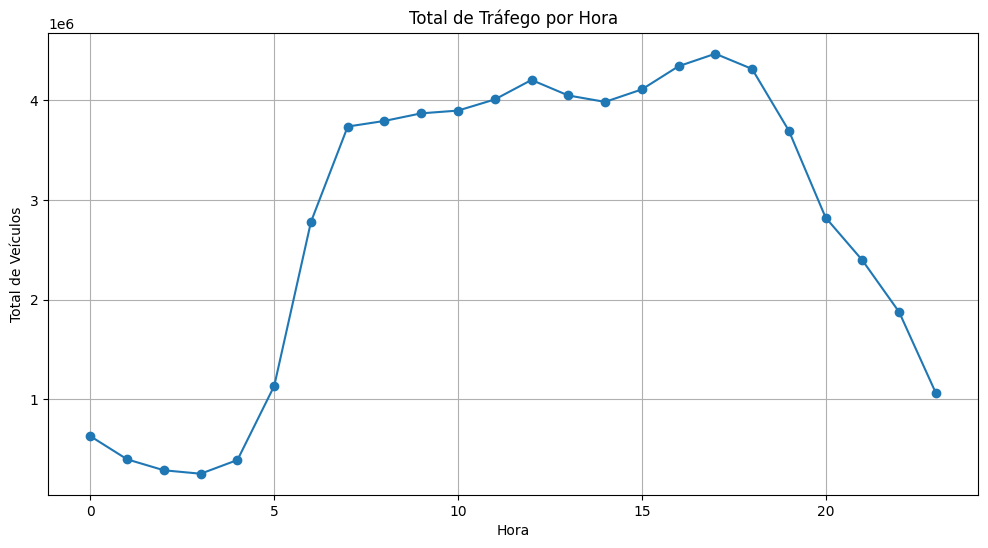

In [20]:
# @title Total de tráfego por hora
df['hora'] = df['hora'].astype(int)
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('hora')['total_veículos'].sum(), marker='o')
plt.title('Total de Tráfego por Hora')
plt.xlabel('Hora')
plt.ylabel('Total de Veículos')
plt.grid(True)
plt.show()


Conforme o gráfico, podemos ver que o número de veículos aumenta a partir das 5 horas, atingindo seu pico por volta das 15 horas. Depois disso, o número de veículos vai diminuindo gradualmente. Esse comportamento é provavelmente causado pelo início das atividades diárias e o horário de pico. Durante o dia, o fluxo se mantém estável, mas cai à noite, especialmente após as 20 horas.

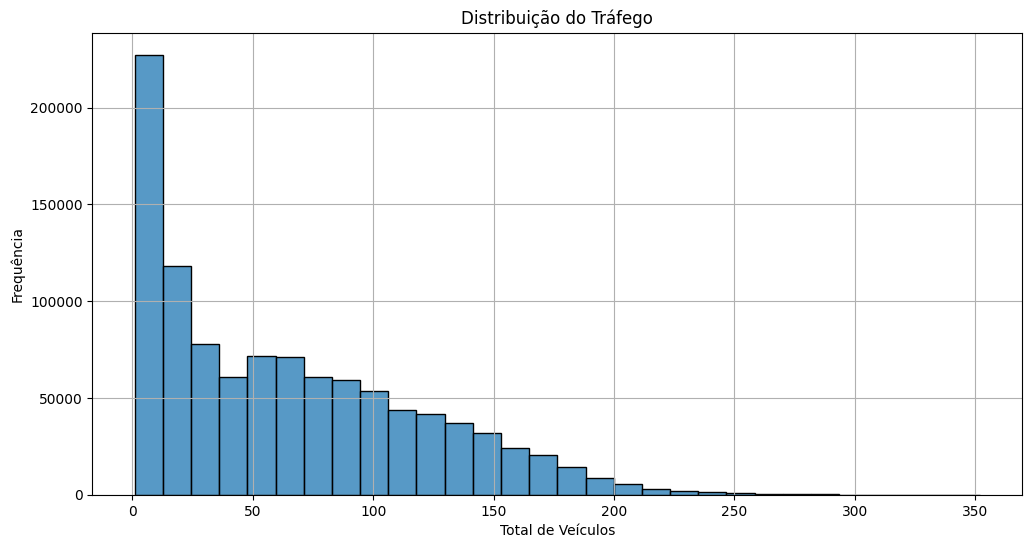

In [21]:
# @Distribuição do tráfego
plt.figure(figsize=(12, 6))
sns.histplot(df['total_veículos'], bins=30, kde=False)
plt.title('Distribuição do Tráfego')
plt.xlabel('Total de Veículos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


O histograma mostra como os veículos se distribuem em diferentes intervalos de frequência. A maior parte das observações está concentrada nos intervalos mais baixos, com a maioria dos totais de veículos entre 0 e 50, indicando que, na maior parte do tempo, o fluxo de veículos é relativamente baixo.

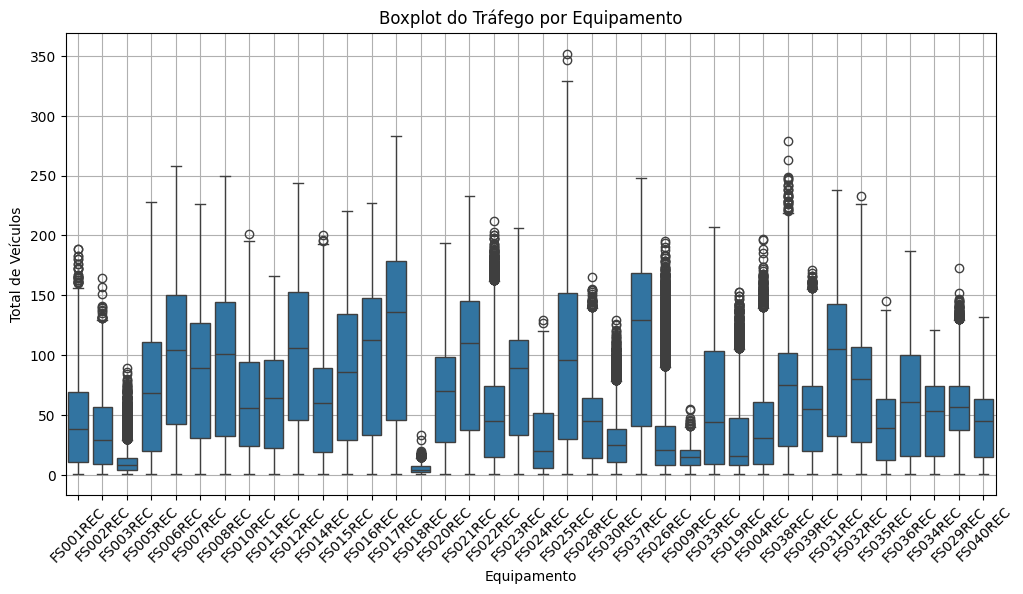

In [22]:
# @title Boxplot do tráfego por equipamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='equipamento', y='total_veículos')
plt.title('Boxplot do Tráfego por Equipamento')
plt.xlabel('Equipamento')
plt.ylabel('Total de Veículos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


O boxplot mostra a variação do total de veículos entre os diferentes equipamentos. Nele, é possível observar a presença de outliers em vários equipamentos, indicando dias ou períodos em que o número de veículos foi significativamente diferente do habitual. Esses outliers podem apontar picos de tráfego ou eventos incomuns que influenciaram o fluxo de veículos nesses locais.

<Figure size 1200x800 with 0 Axes>

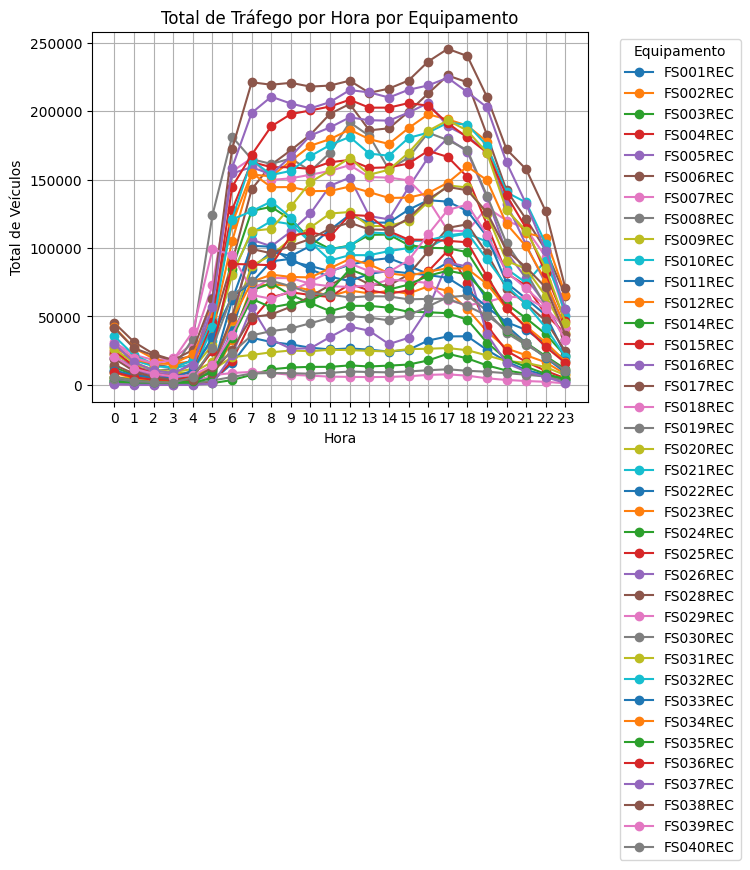

In [23]:
# @title Total de tráfego por hora por equipamento


total_veiculos_por_hora_equipamento = df.groupby(['hora', 'equipamento'])['total_veículos'].sum().unstack()

plt.figure(figsize=(12, 8))
total_veiculos_por_hora_equipamento.plot(kind='line', marker='o')
plt.title('Total de Tráfego por Hora por Equipamento')
plt.xlabel('Hora')
plt.ylabel('Total de Veículos')
plt.grid(True)
plt.xticks(range(0, 24))

plt.legend(title='Equipamento', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


O gráfico de linhas mostra o total de veículos por hora para cada radar. Todos os equipamentos apresentam um padrão consistente: o fluxo de veículos começa a subir a partir das 5h, atinge um pico entre 7h e 15h, e depois cai gradualmente até as 23h. Esse comportamento reflete os horários de pico matutinos e vespertinos, que coincidem com os períodos de maior atividade diária e tráfego.

Alguns radares registram números consistentemente mais altos ao longo do dia, sugerindo que estão localizados em áreas de maior fluxo. Outros, com números mais baixos, indicam locais de menor tráfego.

A sobreposição das linhas mostra que, apesar das diferenças no volume de veículos, os padrões horários são bastante semelhantes entre os diferentes equipamentos.

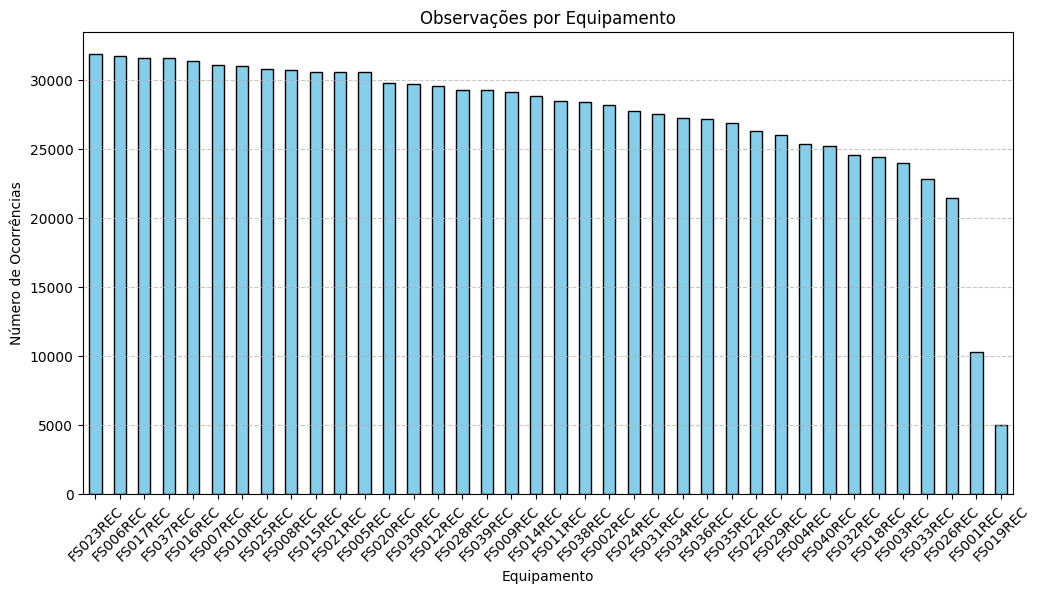

In [24]:
# @title Histograma por equipamento
equipamento_counts = df['equipamento'].value_counts()
plt.figure(figsize=(12, 6))
equipamento_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Observações por Equipamento')
plt.xlabel('Equipamento')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


O gráfico de barras mostra o número de ocorrências registradas por cada radar. A maioria dos radares tem uma distribuição de ocorrências relativamente uniforme, com entre 25.000 e 30.000 registros.

No entanto, alguns radares têm bem menos ocorrências, com menos de 15.000 registros. Para evitar problemas no futuro treinamento do modelo, esses equipamentos serão removidos do dataset.

In [25]:
# @title Remoção dos equipamentos com menor número de observações
equipamento_counts = df['equipamento'].value_counts()
equipamentos_filtrados = equipamento_counts[equipamento_counts >= 20000].index
df = df[df['equipamento'].isin(equipamentos_filtrados)]

In [27]:
# @title Salvando Dataset
df.to_csv('Dataset_tráfego.csv', index=False)
